In [343]:
import pandas as pd
import datetime
import pickle
import binascii
import matplotlib.pyplot as plt

In [344]:
import warnings
warnings.filterwarnings('ignore')

In [345]:
import numpy as np
import os
import pandas as pd
from pathlib import Path
from collections import Counter

In [346]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [347]:
!pip install Kqlmagic --no-cache-dir  --upgrade


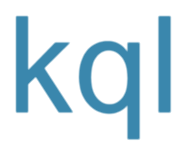

In [348]:
%reload_ext Kqlmagic

In [349]:
%kql AzureDataExplorer://tenant="Unilever.com";code;cluster='dfazuredataexplorer.westeurope';database='dfdataviewer'

In [350]:
%%kql
let stime = now(-2d);
let etime = now();
//let MachineID= "901932";
Common2
//|where MachineId ==MachineId
|where  TS between (stime..etime) and Tag has_any(
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Pressure1",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Pressure2",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Pressure3",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Temperature1",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Temperature2",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Conductivity",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_PumpRPM",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Flow_liters_Min",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Gallons_Min",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Control_Pressure",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Level_Percentage",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Shear_Rate",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_DeltaP",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Shear_Stress",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Calculated_Viscosity",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Pump_Flow_Rate",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_PumpSR",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Calculated_Viscosity",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Pump_Viscosity",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_216536_CUC_Number",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_216536_ProgramSONO7_SONOLATE_BATCHID",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_216536_SONO7_SONOLATE_Running")
| summarize arg_max(TS, Value) by bin(TS, 2m), Tag // summarizes the value by hour
| sort by Tag, TS asc
|parse Tag with *"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_" Test
| evaluate pivot(Test, max(Value),TS)

TS,216536_CUC_Number,216536_ProgramSONO7_SONOLATE_BATCHID,216536_SONO7_SONOLATE_Running,901932_Calculated_Viscosity,901932_Conductivity,901932_Control_Pressure,901932_DeltaP,901932_Flow_liters_Min,901932_Gallons_Min,901932_Level_Percentage,901932_Pressure1,901932_Pressure2,901932_Pressure3,901932_Pump_Flow_Rate,901932_Pump_Viscosity,901932_PumpRPM,901932_PumpSR,901932_Shear_Rate,901932_Shear_Stress,901932_Temperature1,901932_Temperature2
2023-05-26 18:06:00+00:00,69631728,230075,0,0,0.07,0,0,0,0,0,0.1,-1,-0.1,0,0,0,0,0,0,23.5,23.4
2023-05-26 18:08:00+00:00,69631728,230075,0,0,0.07,0,0,0,0,0,0.1,-1,-0.1,0,0,0,0,0,0,23.5,23.4
2023-05-25 15:54:00+00:00,69631727,230005,0,0,0.07,0,0,0,0,0,0.1,-1,-0.1,0,0,0,0,0,0,23.5,23.4
2023-05-25 15:56:00+00:00,69631727,230005,0,0,0.07,0,0,0,0,0,0.1,-1,-0.1,0,0,0,0,0,0,23.5,23.4
2023-05-25 15:40:00+00:00,69631727,230005,0,0,0.07,0,0,0,0,0,0.1,-1,-0.1,0,0,0,0,0,0,23.5,23.4
2023-05-25 15:42:00+00:00,69631727,230005,0,0,0.07,0,0,0,0,0,0.1,-1,-0.1,0,0,0,0,0,0,23.5,23.4
2023-05-25 15:10:00+00:00,69631727,230005,1,2826.57,0.07,0,92.77,0,0,0,0.1,-1,-0.1,2.61,2859.15,0,10.51,10.63,30.06,23.5,23.4
2023-05-25 15:12:00+00:00,69631727,230005,1,2826.57,0.07,0,92.77,0,0,0,0.1,-1,-0.1,2.61,2859.15,0,10.51,10.63,30.06,23.5,23.4
2023-05-25 14:44:00+00:00,69631727,230005,0,2826.57,0.07,0,92.77,0,0,0,0.1,-1,-0.1,2.61,2859.15,0,10.51,10.63,30.06,23.5,23.4
2023-05-25 14:46:00+00:00,69631727,230005,0,2826.57,0.07,0,92.77,0,0,0,0.1,-1,-0.1,2.61,2859.15,0,10.51,10.63,30.06,23.5,23.4


[{'TS': datetime.datetime(2023, 5, 26, 18, 6, tzinfo=tzutc()), '216536_CUC_Number': '69631728', '216536_ProgramSONO7_SONOLATE_BATCHID': '230075', '216536_SONO7_SONOLATE_Running': '0', '901932_Calculated_Viscosity': '0', '901932_Conductivity': '0.07', '901932_Control_Pressure': '0', '901932_DeltaP': '0', '901932_Flow_liters_Min': '0', '901932_Gallons_Min': '0', '901932_Level_Percentage': '0', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Pump_Flow_Rate': '0', '901932_Pump_Viscosity': '0', '901932_PumpRPM': '0', '901932_PumpSR': '0', '901932_Shear_Rate': '0', '901932_Shear_Stress': '0', '901932_Temperature1': '23.5', '901932_Temperature2': '23.4'},
 {'TS': datetime.datetime(2023, 5, 26, 18, 8, tzinfo=tzutc()), '216536_CUC_Number': '69631728', '216536_ProgramSONO7_SONOLATE_BATCHID': '230075', '216536_SONO7_SONOLATE_Running': '0', '901932_Calculated_Viscosity': '0', '901932_Conductivity': '0.07', '901932_Control_Pressure': '0', '901932_DeltaP': '0', '901932_Flow_liters_Min': '0', '901932_Gallons_Min': '0', '901932_Level_Percentage': '0', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Pump_Flow_Rate': '0', '901932_Pump_Viscosity': '0', '901932_PumpRPM': '0', '901932_PumpSR': '0', '901932_Shear_Rate': '0', '901932_Shear_Stress': '0', '901932_Temperature1': '23.5', '901932_Temperature2': '23.4'},
 {'TS': datetime.datetime(2023, 5, 25, 15, 54, tzinfo=tzutc()), '216536_CUC_Number': '69631727', '216536_ProgramSONO7_SONOLATE_BATCHID': '230005', '216536_SONO7_SONOLATE_Running': '0', '901932_Calculated_Viscosity': '0', '901932_Conductivity': '0.07', '901932_Control_Pressure': '0', '901932_DeltaP': '0', '901932_Flow_liters_Min': '0', '901932_Gallons_Min': '0', '901932_Level_Percentage': '0', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Pump_Flow_Rate': '0', '901932_Pump_Viscosity': '0', '901932_PumpRPM': '0', '901932_PumpSR': '0', '901932_Shear_Rate': '0', '901932_Shear_Stress': '0', '901932_Temperature1': '23.5', '901932_Temperature2': '23.4'},
 {'TS': datetime.datetime(2023, 5, 25, 15, 56, tzinfo=tzutc()), '216536_CUC_Number': '69631727', '216536_ProgramSONO7_SONOLATE_BATCHID': '230005', '216536_SONO7_SONOLATE_Running': '0', '901932_Calculated_Viscosity': '0', '901932_Conductivity': '0.07', '901932_Control_Pressure': '0', '901932_DeltaP': '0', '901932_Flow_liters_Min': '0', '901932_Gallons_Min': '0', '901932_Level_Percentage': '0', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Pump_Flow_Rate': '0', '901932_Pump_Viscosity': '0', '901932_PumpRPM': '0', '901932_PumpSR': '0', '901932_Shear_Rate': '0', '901932_Shear_Stress': '0', '901932_Temperature1': '23.5', '901932_Temperature2': '23.4'},
 {'TS': datetime.datetime(2023, 5, 25, 15, 40, tzinfo=tzutc()), '216536_CUC_Number': '69631727', '216536_ProgramSONO7_SONOLATE_BATCHID': '230005', '216536_SONO7_SONOLATE_Running': '0', '901932_Calculated_Viscosity': '0', '901932_Conductivity': '0.07', '901932_Control_Pressure': '0', '901932_DeltaP': '0', '901932_Flow_liters_Min': '0', '901932_Gallons_Min': '0', '901932_Level_Percentage': '0', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Pump_Flow_Rate': '0', '901932_Pump_Viscosity': '0', '901932_PumpRPM': '0', '901932_PumpSR': '0', '901932_Shear_Rate': '0', '901932_Shear_Stress': '0', '901932_Temperature1': '23.5', '901932_Temperature2': '23.4'},
 {'TS': datetime.datetime(2023, 5, 25, 15, 42, tzinfo=tzutc()), '216536_CUC_Number': '69631727', '216536_ProgramSONO7_SONOLATE_BATCHID': '230005', '216536_SONO7_SONOLATE_Running': '0', '901932_Calculated_Viscosity': '0', '901932_Conductivity': '0.07', '901932_Control_Pressure': '0', '901932_DeltaP': '0', '901932_Flow_liters_Min': '0', '901932_Gallons_Min': '0', '901932_Level_Percentage': '0', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Pump_Flow_Rate': '0', 

In [351]:
df = _kql_raw_result_.to_dataframe()
df.head(30)

,TS,216536_CUC_Number,216536_ProgramSONO7_SONOLATE_BATCHID,216536_SONO7_SONOLATE_Running,901932_Calculated_Viscosity,901932_Conductivity,901932_Control_Pressure,901932_DeltaP,901932_Flow_liters_Min,901932_Gallons_Min,...,901932_Pressure2,901932_Pressure3,901932_Pump_Flow_Rate,901932_Pump_Viscosity,901932_PumpRPM,901932_PumpSR,901932_Shear_Rate,901932_Shear_Stress,901932_Temperature1,901932_Temperature2
0,2023-05-26 18:06:00+00:00,69631728,230075,0,0,0.07,0,0,0,0,...,-1,-0.1,0,0,0,0,0,0,23.5,23.4
1,2023-05-26 18:08:00+00:00,69631728,230075,0,0,0.07,0,0,0,0,...,-1,-0.1,0,0,0,0,0,0,23.5,23.4
2,2023-05-25 15:54:00+00:00,69631727,230005,0,0,0.07,0,0,0,0,...,-1,-0.1,0,0,0,0,0,0,23.5,23.4
3,2023-05-25 15:56:00+00:00,69631727,230005,0,0,0.07,0,0,0,0,...,-1,-0.1,0,0,0,0,0,0,23.5,23.4
4,2023-05-25 15:40:00+00:00,69631727,230005,0,0,0.07,0,0,0,0,...,-1,-0.1,0,0,0,0,0,0,23.5,23.4
5,2023-05-25 15:42:00+00:00,69631727,230005,0,0,0.07,0,0,0,0,...,-1,-0.1,0,0,0,0,0,0,23.5,23.4
6,2023-05-25 15:10:00+00:00,69631727,230005,1,2826.57,0.07,0,92.77,0,0,...,-1,-0.1,2.61,2859.15,0,10.51,10.63,30.06,23.5,23.4
7,2023-05-25 15:12:00+00:00,69631727,230005,1,2826.57,0.07,0,92.77,0,0,...,-1,-0.1,2.61,2859.15,0,10.51,10.63,30.06,23.5,23.4
8,2023-05-25 14:44:00+00:00,69631727,230005,0,2826.57,0.07,0,92.77,0,0,...,-1,-0.1,2.61,2859.15,0,10.51,10.63,30.06,23.5,23.4
9,2023-05-25 14:46:00+00:00,69631727,230005,0,2826.57,0.07,0,92.77,0,0,...,-1,-0.1,2.61,2859.15,0,10.51,10.63,30.06,23.5,23.4


In [352]:
print(df.shape, "\n")
print(df[-4:])

(1440, 22) 

                            TS 216536_CUC_Number  \
1436 2023-05-24 23:48:00+00:00           FLUSHED   
1437 2023-05-24 23:50:00+00:00           FLUSHED   
1438 2023-05-25 00:14:00+00:00           FLUSHED   
1439 2023-05-25 00:24:00+00:00           FLUSHED   

     216536_ProgramSONO7_SONOLATE_BATCHID 216536_SONO7_SONOLATE_Running  \
1436                               230043                             0   
1437                               230043                             0   
1438                               230043                             0   
1439                               230043                             0   

     901932_Calculated_Viscosity 901932_Conductivity 901932_Control_Pressure  \
1436                           0                0.07                       0   
1437                           0                0.07                       0   
1438                           0                0.07                       0   
1439                          

In [353]:
df.columns

Index(['TS', '216536_CUC_Number', '216536_ProgramSONO7_SONOLATE_BATCHID',
       '216536_SONO7_SONOLATE_Running', '901932_Calculated_Viscosity',
       '901932_Conductivity', '901932_Control_Pressure', '901932_DeltaP',
       '901932_Flow_liters_Min', '901932_Gallons_Min',
       '901932_Level_Percentage', '901932_Pressure1', '901932_Pressure2',
       '901932_Pressure3', '901932_Pump_Flow_Rate', '901932_Pump_Viscosity',
       '901932_PumpRPM', '901932_PumpSR', '901932_Shear_Rate',
       '901932_Shear_Stress', '901932_Temperature1', '901932_Temperature2'],
      dtype='object')

In [354]:
df_new = df.rename(columns={'TS': 'Timestamp','216536_SONO7_SONOLATE_Running':'Sono_Run','901932_Conductivity':'Conductivity',
'901932_Pressure1':'Pressure1','901932_Pressure2':'Pressure2','901932_Pressure3':'Pressure3',
'901932_Temperature1':'Temperature1','216536_CUC_Number':'CUC','216536_ProgramSONO7_SONOLATE_BATCHID':'BATCHID',
'901932_Calculated_Viscosity':'Cal_Viscosity','901932_Flow_liters_Min':'FLOW_L/min','901932_Level_Percentage':'LEVEL%', '901932_Pump_Flow_Rate':'Pump_Flow_Rate',
'901932_Pump_Viscosity':'Pump_Visc','901932_PumpRPM':'PumpRPM','901932_PumpSR':'PumpSR','901932_Shear_Rate':'Shear_Rate','901932_Shear_Stress':'Shear_Stress',
'901932_Shear_Stress':'Shear_Stress','901932_Control_Pressure':'Control_Pressure','901932_Temperature2':'Temperature2','901932_Gallons_Min':'Gallons_Min',
'901932_DeltaP':'DeltaP'})
print(df_new)

                     Timestamp       CUC BATCHID Sono_Run Cal_Viscosity  \
0    2023-05-26 18:06:00+00:00  69631728  230075        0             0   
1    2023-05-26 18:08:00+00:00  69631728  230075        0             0   
2    2023-05-25 15:54:00+00:00  69631727  230005        0             0   
3    2023-05-25 15:56:00+00:00  69631727  230005        0             0   
4    2023-05-25 15:40:00+00:00  69631727  230005        0             0   
...                        ...       ...     ...      ...           ...   
1435 2023-05-24 23:30:00+00:00   FLUSHED  230043        0             0   
1436 2023-05-24 23:48:00+00:00   FLUSHED  230043        0             0   
1437 2023-05-24 23:50:00+00:00   FLUSHED  230043        0             0   
1438 2023-05-25 00:14:00+00:00   FLUSHED  230043        0             0   
1439 2023-05-25 00:24:00+00:00   FLUSHED  230043        0             0   

     Conductivity Control_Pressure DeltaP FLOW_L/min Gallons_Min  ...  \
0            0.07         

In [355]:
df_new.head(10)


,Timestamp,CUC,BATCHID,Sono_Run,Cal_Viscosity,Conductivity,Control_Pressure,DeltaP,FLOW_L/min,Gallons_Min,...,Pressure2,Pressure3,Pump_Flow_Rate,Pump_Visc,PumpRPM,PumpSR,Shear_Rate,Shear_Stress,Temperature1,Temperature2
0,2023-05-26 18:06:00+00:00,69631728,230075,0,0,0.07,0,0,0,0,...,-1,-0.1,0,0,0,0,0,0,23.5,23.4
1,2023-05-26 18:08:00+00:00,69631728,230075,0,0,0.07,0,0,0,0,...,-1,-0.1,0,0,0,0,0,0,23.5,23.4
2,2023-05-25 15:54:00+00:00,69631727,230005,0,0,0.07,0,0,0,0,...,-1,-0.1,0,0,0,0,0,0,23.5,23.4
3,2023-05-25 15:56:00+00:00,69631727,230005,0,0,0.07,0,0,0,0,...,-1,-0.1,0,0,0,0,0,0,23.5,23.4
4,2023-05-25 15:40:00+00:00,69631727,230005,0,0,0.07,0,0,0,0,...,-1,-0.1,0,0,0,0,0,0,23.5,23.4
5,2023-05-25 15:42:00+00:00,69631727,230005,0,0,0.07,0,0,0,0,...,-1,-0.1,0,0,0,0,0,0,23.5,23.4
6,2023-05-25 15:10:00+00:00,69631727,230005,1,2826.57,0.07,0,92.77,0,0,...,-1,-0.1,2.61,2859.15,0,10.51,10.63,30.06,23.5,23.4
7,2023-05-25 15:12:00+00:00,69631727,230005,1,2826.57,0.07,0,92.77,0,0,...,-1,-0.1,2.61,2859.15,0,10.51,10.63,30.06,23.5,23.4
8,2023-05-25 14:44:00+00:00,69631727,230005,0,2826.57,0.07,0,92.77,0,0,...,-1,-0.1,2.61,2859.15,0,10.51,10.63,30.06,23.5,23.4
9,2023-05-25 14:46:00+00:00,69631727,230005,0,2826.57,0.07,0,92.77,0,0,...,-1,-0.1,2.61,2859.15,0,10.51,10.63,30.06,23.5,23.4


In [356]:
df_new.CUC.unique()

array(['69631728', '69631727', '68391499', 'FLUSHED', '69590012',
       '68714859', 'CIPD', '67787678', '69637184', '69640104', '69633533',
       '', '68367863'], dtype=object)

In [357]:
df_new.columns

Index(['Timestamp', 'CUC', 'BATCHID', 'Sono_Run', 'Cal_Viscosity',
       'Conductivity', 'Control_Pressure', 'DeltaP', 'FLOW_L/min',
       'Gallons_Min', 'LEVEL%', 'Pressure1', 'Pressure2', 'Pressure3',
       'Pump_Flow_Rate', 'Pump_Visc', 'PumpRPM', 'PumpSR', 'Shear_Rate',
       'Shear_Stress', 'Temperature1', 'Temperature2'],
      dtype='object')

In [358]:
df_new.dtypes

Timestamp           datetime64[ns, UTC]
CUC                              object
BATCHID                          object
Sono_Run                         object
Cal_Viscosity                    object
Conductivity                     object
Control_Pressure                 object
DeltaP                           object
FLOW_L/min                       object
Gallons_Min                      object
LEVEL%                           object
Pressure1                        object
Pressure2                        object
Pressure3                        object
Pump_Flow_Rate                   object
Pump_Visc                        object
PumpRPM                          object
PumpSR                           object
Shear_Rate                       object
Shear_Stress                     object
Temperature1                     object
Temperature2                     object
dtype: object

In [359]:
print(df_new.shape, "\n")
print(df_new[-4:])

(1440, 22) 

                     Timestamp      CUC BATCHID Sono_Run Cal_Viscosity  \
1436 2023-05-24 23:48:00+00:00  FLUSHED  230043        0             0   
1437 2023-05-24 23:50:00+00:00  FLUSHED  230043        0             0   
1438 2023-05-25 00:14:00+00:00  FLUSHED  230043        0             0   
1439 2023-05-25 00:24:00+00:00  FLUSHED  230043        0             0   

     Conductivity Control_Pressure DeltaP FLOW_L/min Gallons_Min  ...  \
1436         0.07                0      0          0           0  ...   
1437         0.07                0      0          0           0  ...   
1438         0.07                0      0          0           0  ...   
1439         0.07                0      0          0           0  ...   

     Pressure2 Pressure3 Pump_Flow_Rate Pump_Visc PumpRPM PumpSR Shear_Rate  \
1436        -1      -0.1              0         0       0      0          0   
1437        -1      -0.1              0         0       0      0          0   
1438        -

In [360]:
##df_new.replace('0', np.nan, inplace=True)## 
df_new['CUC'].replace('CIPD', np.NaN, inplace=True)
df_new.head()

,Timestamp,CUC,BATCHID,Sono_Run,Cal_Viscosity,Conductivity,Control_Pressure,DeltaP,FLOW_L/min,Gallons_Min,...,Pressure2,Pressure3,Pump_Flow_Rate,Pump_Visc,PumpRPM,PumpSR,Shear_Rate,Shear_Stress,Temperature1,Temperature2
0,2023-05-26 18:06:00+00:00,69631728,230075,0,0,0.07,0,0,0,0,...,-1,-0.1,0,0,0,0,0,0,23.5,23.4
1,2023-05-26 18:08:00+00:00,69631728,230075,0,0,0.07,0,0,0,0,...,-1,-0.1,0,0,0,0,0,0,23.5,23.4
2,2023-05-25 15:54:00+00:00,69631727,230005,0,0,0.07,0,0,0,0,...,-1,-0.1,0,0,0,0,0,0,23.5,23.4
3,2023-05-25 15:56:00+00:00,69631727,230005,0,0,0.07,0,0,0,0,...,-1,-0.1,0,0,0,0,0,0,23.5,23.4
4,2023-05-25 15:40:00+00:00,69631727,230005,0,0,0.07,0,0,0,0,...,-1,-0.1,0,0,0,0,0,0,23.5,23.4


In [384]:
##df_new.replace('0', np.nan, inplace=True)## 
df_new['CUC'].replace('FLUSHED', np.NaN, inplace=True)
df_new.head()

,Timestamp,CUC,BATCHID,Sono_Run,Cal_Viscosity,Conductivity,Control_Pressure,DeltaP,FLOW_L/min,Gallons_Min,...,Pressure2,Pressure3,Pump_Flow_Rate,Pump_Visc,PumpRPM,PumpSR,Shear_Rate,Shear_Stress,Temperature1,Temperature2
6,1685027400000000000,69631727,230005,1,2826,0,0,92,0,0,...,-1,0,2,2859,0,10,10,30,23,23
7,1685027520000000000,69631727,230005,1,2826,0,0,92,0,0,...,-1,0,2,2859,0,10,10,30,23,23
10,1685022720000000000,69631727,0,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
11,1685022840000000000,69631727,230005,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
12,1685022960000000000,69631727,230005,1,1462,0,0,45,0,0,...,-1,0,2,1453,0,10,10,14,23,23


In [385]:
##df_new.replace('0', np.nan, inplace=True)## 
df_new['Sono_Run'].replace('0', np.NaN, inplace=True)
df_new.head()

,Timestamp,CUC,BATCHID,Sono_Run,Cal_Viscosity,Conductivity,Control_Pressure,DeltaP,FLOW_L/min,Gallons_Min,...,Pressure2,Pressure3,Pump_Flow_Rate,Pump_Visc,PumpRPM,PumpSR,Shear_Rate,Shear_Stress,Temperature1,Temperature2
6,1685027400000000000,69631727,230005,1,2826,0,0,92,0,0,...,-1,0,2,2859,0,10,10,30,23,23
7,1685027520000000000,69631727,230005,1,2826,0,0,92,0,0,...,-1,0,2,2859,0,10,10,30,23,23
10,1685022720000000000,69631727,0,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
11,1685022840000000000,69631727,230005,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
12,1685022960000000000,69631727,230005,1,1462,0,0,45,0,0,...,-1,0,2,1453,0,10,10,14,23,23


In [386]:
df_new.dropna(inplace=True)
df_new.head(100)

,Timestamp,CUC,BATCHID,Sono_Run,Cal_Viscosity,Conductivity,Control_Pressure,DeltaP,FLOW_L/min,Gallons_Min,...,Pressure2,Pressure3,Pump_Flow_Rate,Pump_Visc,PumpRPM,PumpSR,Shear_Rate,Shear_Stress,Temperature1,Temperature2
6,1685027400000000000,69631727,230005,1,2826,0,0,92,0,0,...,-1,0,2,2859,0,10,10,30,23,23
7,1685027520000000000,69631727,230005,1,2826,0,0,92,0,0,...,-1,0,2,2859,0,10,10,30,23,23
10,1685022720000000000,69631727,0,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
11,1685022840000000000,69631727,230005,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
12,1685022960000000000,69631727,230005,1,1462,0,0,45,0,0,...,-1,0,2,1453,0,10,10,14,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1685068200000000000,68714859,230156,1,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,23,23
301,1685066520000000000,68714859,230156,1,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,23,23
302,1685066640000000000,68714859,230156,1,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,23,23
324,1685068320000000000,68714859,230156,1,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,23,23


In [387]:
df_new['Cal_Viscosity'].replace('', np.NaN, inplace=True)
df_new.head()

,Timestamp,CUC,BATCHID,Sono_Run,Cal_Viscosity,Conductivity,Control_Pressure,DeltaP,FLOW_L/min,Gallons_Min,...,Pressure2,Pressure3,Pump_Flow_Rate,Pump_Visc,PumpRPM,PumpSR,Shear_Rate,Shear_Stress,Temperature1,Temperature2
6,1685027400000000000,69631727,230005,1,2826,0,0,92,0,0,...,-1,0,2,2859,0,10,10,30,23,23
7,1685027520000000000,69631727,230005,1,2826,0,0,92,0,0,...,-1,0,2,2859,0,10,10,30,23,23
10,1685022720000000000,69631727,0,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
11,1685022840000000000,69631727,230005,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
12,1685022960000000000,69631727,230005,1,1462,0,0,45,0,0,...,-1,0,2,1453,0,10,10,14,23,23


In [388]:
df_new.dropna(inplace=True)
df_new.head(30)

,Timestamp,CUC,BATCHID,Sono_Run,Cal_Viscosity,Conductivity,Control_Pressure,DeltaP,FLOW_L/min,Gallons_Min,...,Pressure2,Pressure3,Pump_Flow_Rate,Pump_Visc,PumpRPM,PumpSR,Shear_Rate,Shear_Stress,Temperature1,Temperature2
6,1685027400000000000,69631727,230005,1,2826,0,0,92,0,0,...,-1,0,2,2859,0,10,10,30,23,23
7,1685027520000000000,69631727,230005,1,2826,0,0,92,0,0,...,-1,0,2,2859,0,10,10,30,23,23
10,1685022720000000000,69631727,0,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
11,1685022840000000000,69631727,230005,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
12,1685022960000000000,69631727,230005,1,1462,0,0,45,0,0,...,-1,0,2,1453,0,10,10,14,23,23
15,1685023080000000000,69631727,230005,1,2848,0,0,88,0,0,...,-1,0,2,2717,0,10,10,28,23,23
16,1685019480000000000,68391499,230083,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
17,1685020440000000000,68391499,230083,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
18,1685020200000000000,68391499,230083,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
21,1685019360000000000,68391499,230083,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23


In [389]:
df_new = df_new.apply(pd.to_numeric, errors='ignore')

In [390]:
df_new.dtypes

Timestamp           int64
CUC                 int64
BATCHID             int64
Sono_Run            int64
Cal_Viscosity       int64
Conductivity        int64
Control_Pressure    int64
DeltaP              int64
FLOW_L/min          int64
Gallons_Min         int64
LEVEL%              int64
Pressure1           int64
Pressure2           int64
Pressure3           int64
Pump_Flow_Rate      int64
Pump_Visc           int64
PumpRPM             int64
PumpSR              int64
Shear_Rate          int64
Shear_Stress        int64
Temperature1        int64
Temperature2        int64
dtype: object

In [367]:
df_new['Sono_Run'] = df_new['Sono_Run'].values.astype(np.int64)

In [368]:
df_new['Cal_Viscosity'] = df_new['Cal_Viscosity'].values.astype(np.int64)

In [369]:
df_new['Conductivity'] = df_new['Conductivity'].values.astype(np.int64)

In [370]:
df_new['Control_Pressure'] = df_new['Control_Pressure'].values.astype(np.int64)

In [371]:
df_new['DeltaP'] = df_new['DeltaP'].values.astype(np.int64)

In [372]:
df_new['Pressure1'] = df_new['Pressure1'].values.astype(np.int64)

In [373]:
df_new['Pressure2'] = df_new['Pressure2'].values.astype(np.int64)

In [374]:
df_new['Pressure3'] = df_new['Pressure3'].values.astype(np.int64)

In [375]:
df_new['Pump_Flow_Rate'] = df_new['Pump_Flow_Rate'].values.astype(np.int64)

In [376]:
df_new['Pump_Visc'] = df_new['Pump_Visc'].values.astype(np.int64)

In [377]:
df_new['PumpRPM'] = df_new['PumpRPM'].values.astype(np.int64)

In [378]:
df_new['PumpSR'] = df_new['PumpSR'].values.astype(np.int64)

In [379]:
df_new['Shear_Rate'] = df_new['Shear_Rate'].values.astype(np.int64)

In [380]:
df_new['Temperature1'] = df_new['Temperature1'].values.astype(np.int64)

In [381]:
df_new['Temperature2'] = df_new['Temperature2'].values.astype(np.int64)

In [382]:
df_new['Shear_Stress'] = df_new['Shear_Stress'].values.astype(np.int64)

In [391]:
df_new['CUC'] = df_new['CUC'].values.astype(np.int64)

In [392]:
df_new.dtypes

Timestamp           int64
CUC                 int64
BATCHID             int64
Sono_Run            int64
Cal_Viscosity       int64
Conductivity        int64
Control_Pressure    int64
DeltaP              int64
FLOW_L/min          int64
Gallons_Min         int64
LEVEL%              int64
Pressure1           int64
Pressure2           int64
Pressure3           int64
Pump_Flow_Rate      int64
Pump_Visc           int64
PumpRPM             int64
PumpSR              int64
Shear_Rate          int64
Shear_Stress        int64
Temperature1        int64
Temperature2        int64
dtype: object

In [393]:
df_new.describe()


,Timestamp,CUC,BATCHID,Sono_Run,Cal_Viscosity,Conductivity,Control_Pressure,DeltaP,FLOW_L/min,Gallons_Min,...,Pressure2,Pressure3,Pump_Flow_Rate,Pump_Visc,PumpRPM,PumpSR,Shear_Rate,Shear_Stress,Temperature1,Temperature2
count,3.530000e+02,3.530000e+02,353.000000,3.530000e+02,353.000000,353.0,353.0,353.000000,353.0,353.0,...,353.0,353.0,353.000000,353.000000,353.0,353.000000,353.000000,353.000000,353.0,353.0
mean,1.685014e+18,6.911808e+07,228107.637394,-2.612853e+16,598.215297,0.0,0.0,17.764873,0.0,0.0,...,-1.0,0.0,0.362606,587.518414,0.0,1.903683,1.909348,5.679887,23.0,23.0
std,4.293354e+13,6.390032e+05,21148.699780,4.909106e+17,1228.548637,0.0,0.0,37.654888,0.0,0.0,...,0.0,0.0,0.718241,1223.345708,0.0,3.629396,3.641264,12.113200,0.0,0.0
min,1.684953e+18,6.778768e+07,0.000000,-9.223372e+18,0.000000,0.0,0.0,0.000000,0.0,0.0,...,-1.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,23.0,23.0
25%,1.684984e+18,6.871486e+07,230022.000000,1.000000e+00,0.000000,0.0,0.0,0.000000,0.0,0.0,...,-1.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,23.0,23.0
50%,1.685009e+18,6.959001e+07,230046.000000,1.000000e+00,0.000000,0.0,0.0,0.000000,0.0,0.0,...,-1.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,23.0,23.0
75%,1.685044e+18,6.963173e+07,230083.000000,1.000000e+00,0.000000,0.0,0.0,0.000000,0.0,0.0,...,-1.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,23.0,23.0
max,1.685125e+18,6.964010e+07,230157.000000,1.000000e+00,4111.000000,0.0,0.0,125.000000,0.0,0.0,...,-1.0,0.0,2.000000,4108.000000,0.0,10.000000,10.000000,40.000000,23.0,23.0


In [395]:
df_new.head(30)

,Timestamp,CUC,BATCHID,Sono_Run,Cal_Viscosity,Conductivity,Control_Pressure,DeltaP,FLOW_L/min,Gallons_Min,...,Pressure2,Pressure3,Pump_Flow_Rate,Pump_Visc,PumpRPM,PumpSR,Shear_Rate,Shear_Stress,Temperature1,Temperature2
6,1685027400000000000,69631727,230005,1,2826,0,0,92,0,0,...,-1,0,2,2859,0,10,10,30,23,23
7,1685027520000000000,69631727,230005,1,2826,0,0,92,0,0,...,-1,0,2,2859,0,10,10,30,23,23
10,1685022720000000000,69631727,0,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
11,1685022840000000000,69631727,230005,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
12,1685022960000000000,69631727,230005,1,1462,0,0,45,0,0,...,-1,0,2,1453,0,10,10,14,23,23
15,1685023080000000000,69631727,230005,1,2848,0,0,88,0,0,...,-1,0,2,2717,0,10,10,28,23,23
16,1685019480000000000,68391499,230083,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
17,1685020440000000000,68391499,230083,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
18,1685020200000000000,68391499,230083,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23
21,1685019360000000000,68391499,230083,1,1526,0,0,33,0,0,...,-1,0,1,1363,0,7,7,10,23,23


In [424]:
df2 = df_new[['Cal_Viscosity']].copy()
print(df2)

      Cal_Viscosity
6              2826
7              2826
10             1526
11             1526
12             1462
...             ...
1361              0
1397              0
1398              0
1420              0
1421              0

[353 rows x 1 columns]


In [430]:
df2['Cal_Viscosity'].replace('0', np.NaN, inplace=True)
df2.head()

,Cal_Viscosity
date,
6,2826
7,2826
10,1526
11,1526
12,1462


In [431]:
df2.dropna(inplace=True)

In [432]:
df2.index.name='date'

In [266]:
#df2['CUC'] = df2['CUC'].values.astype(object)


In [433]:
df2.shape

(353, 1)

In [268]:
#df3=df2.loc[df2['CUC'].isin([69631727])]

In [399]:
#df3.shape

In [434]:
train = df2.head(1671)
test = df2.tail(1671)

In [435]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [436]:
df2.head(12)

,Cal_Viscosity
date,
6,2826
7,2826
10,1526
11,1526
12,1462
15,2848
16,1526
17,1526
18,1526


In [272]:
#df4 = df3.drop(columns=['CUC','Timestamp'])

In [320]:
#df4.head()

In [321]:
#df4.shape

In [437]:
print(train)
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

      Cal_Viscosity
date               
6              2826
7              2826
10             1526
11             1526
12             1462
...             ...
1361              0
1397              0
1398              0
1420              0
1421              0

[353 rows x 1 columns]


In [438]:
scaled_train[:10]

array([[0.68742398],
       [0.68742398],
       [0.37119922],
       [0.37119922],
       [0.35563123],
       [0.69277548],
       [0.37119922],
       [0.37119922],
       [0.37119922],
       [0.37119922]])

In [208]:
!pip install keras


     ---------------------------------------- 1.7/1.7 MB 352.7 kB/s eta 0:00:00


In [210]:
!pip install tensorflow

     ------------------------------------ 266.3/266.3 MB 604.5 kB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 24.4/24.4 MB 430.4 kB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 423.0 kB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 429.2 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 388.7 kB/s eta 0:00:00
     ------------------------------------ 439.2/439.2 kB 584.4 kB/s eta 0:00:00
     ------------------------------------ 896.6/896.6 kB 886.3 kB/s eta 0:00:00
     ------------------------------------ 181.3/181.3 kB 475.1 kB/s eta 0:00:00
     ------------------------------------ 781.3/781.3 kB 404.6 kB/s eta 0:00:00


In [439]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [440]:
# define generator 
n_input = 10
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
     

In [441]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y:: \n{y}')

Given the Array: 
[0.68742398 0.68742398 0.37119922 0.37119922 0.35563123 0.69277548
 0.37119922 0.37119922 0.37119922 0.37119922]
Predict this y:: 
[[0.37119922]]


In [442]:
X.shape

n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [443]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM

In [444]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(128, input_shape=(22,), activation='relu'))

# model.add(Dense(64, input_shape=(22,), activation='relu'))
model.compile(optimizer='adam', loss='mse')

In [445]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100)               40800     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [446]:
%%time
model.fit(generator, epochs=250, batch_size=128)

Epoch 1/250
341/341 [==============================] - 4s 6ms/step - loss: 0.1196
Epoch 2/250
341/341 [==============================] - 2s 7ms/step - loss: 0.1063
Epoch 3/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 4/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 5/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 6/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 7/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 8/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 9/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 10/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 11/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 12/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 13/250


341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 100/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 101/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 102/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 103/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 104/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 105/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 106/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 107/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 108/250
341/341 [==============================] - 2s 7ms/step - loss: 0.1063
Epoch 109/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 110/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 

341/341 [==============================] - 2s 7ms/step - loss: 0.1063
Epoch 197/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 198/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 199/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 200/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 201/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 202/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 203/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 204/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 205/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 206/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 207/250
341/341 [==============================] - 2s 6ms/step - loss: 0.1063
Epoch 

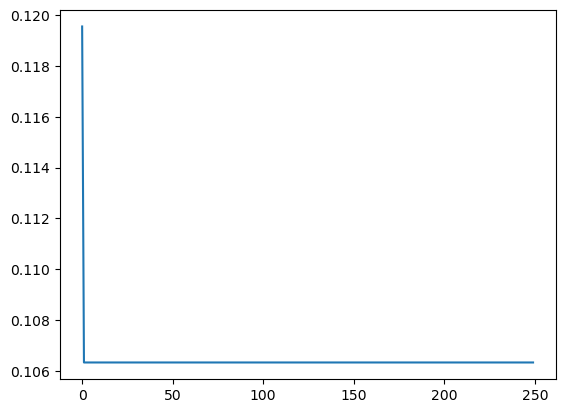

In [447]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [448]:
last_train_batch = scaled_train[-10:]
     

In [449]:
last_train_batch = last_train_batch.reshape((1,  10, n_features))

In [450]:
scaled_test[0]

array([0.68742398])

In [451]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
  current_pred = model.predict_on_batch(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)
     

In [452]:
test_predictions

[array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], d

In [453]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

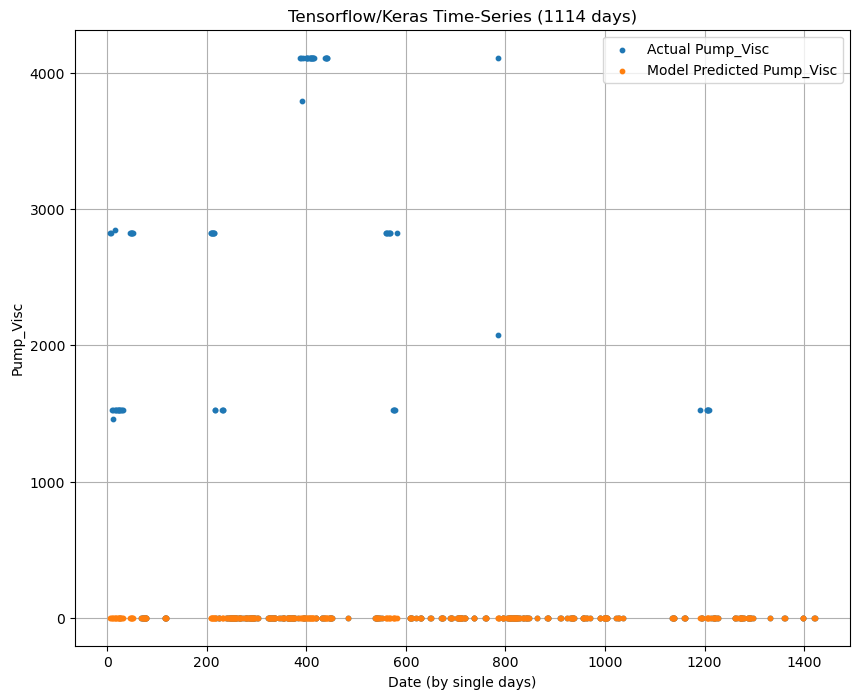

In [454]:
# plot1 = test.tail(1114).plot(figsize=(12,6))
from matplotlib.pyplot import figure 

graphable_test = test.tail(1114).reset_index()

# figure(figsize=(10,8), dpi=80)

plt.scatter(graphable_test['date'], graphable_test['Cal_Viscosity'], s=10)
plt.scatter(graphable_test['date'], graphable_test['Predictions'], s=10)



# plt.plot(test.tail(1114))
ax = plt.gca()
ax.set_axisbelow(True)
plt.grid()
plt.title("Tensorflow/Keras Time-Series (1114 days)")
plt.xlabel("Date (by single days)")
plt.ylabel("Pump_Visc")
plt.legend(['Actual Pump_Visc', 'Model Predicted Pump_Visc'])

fig1 = plt.gcf()
plt.draw()

fig1.set_size_inches(10,8)
# plt.draw()


#from google.colab import files
#fig1.savefig('tf-keras-test.png', dpi=250, bbox_inches='tight')
#files.download("tf-keras-test.png") 


In [457]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
mae = mean_absolute_error(test['Cal_Viscosity'], test['Predictions'])
rmse = sqrt(mean_squared_error(test['Cal_Viscosity'], test['Predictions']))
print('mean absolute error: ' + str(mae))
print('root mean squared error: ' + str(rmse))
     

mean absolute error: 598.2152974504249
root mean squared error: 1364.8873834148733
